# **Importing Libraries**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# **Data Exploration & Pattern Analysis**

# 1. Basic Data Profiling
* Load data and examine structure (~20K sessions)
* Check data types, missing values, and basic statistics
* Analyze distribution of bot vs. human labels

In [18]:
df = pd.read_csv("/Users/ashutoshpatel/Downloads/user_sessions.csv")

df.head()

,session_id,user_agent,ip_address,page_views,session_duration,avg_time_per_page,bounce_rate,scroll_depth,click_count,form_interactions,...,hour_of_day,day_of_week,time_between_clicks,page_load_time,unique_pages_visited,sequential_page_views,back_button_usage,tab_switches,copy_paste_events,is_bot
0,session_000000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,164.29.7.190,7,284,87.73,0.507,41.8,9,2,...,8,3,2505.0,1074.0,5,0.647,0,2,0,0
1,session_000001,python-requests/2.25.1,140.23.152.109,20,193,8.22,0.282,1.3,4,0,...,19,7,494.0,519.0,13,0.955,1,0,0,1
2,session_000002,Scrapy/2.5.1,167.180.140.108,17,88,13.41,0.131,14.1,3,0,...,21,6,556.0,948.0,6,0.842,0,0,0,1
3,session_000003,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,109.88.72.40,10,351,31.70,0.613,47.2,12,4,...,16,7,14190.0,798.0,9,0.639,4,2,2,0
4,session_000004,Mozilla/5.0 (iPhone; CPU iPhone OS 14_7_1 like...,155.68.207.12,6,657,24.61,0.497,68.9,8,2,...,13,4,6817.0,1085.0,6,0.213,2,5,2,0


#### Checking Shape

In [19]:
df.shape

(20000, 27)

#### Info

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   session_id             20000 non-null  object 
 1   user_agent             20000 non-null  object 
 2   ip_address             20000 non-null  object 
 3   page_views             20000 non-null  int64  
 4   session_duration       20000 non-null  int64  
 5   avg_time_per_page      20000 non-null  float64
 6   bounce_rate            20000 non-null  float64
 7   scroll_depth           20000 non-null  float64
 8   click_count            20000 non-null  int64  
 9   form_interactions      20000 non-null  int64  
 10  search_queries         20000 non-null  int64  
 11  request_frequency      20000 non-null  float64
 12  javascript_enabled     20000 non-null  int64  
 13  cookie_enabled         20000 non-null  int64  
 14  screen_resolution      20000 non-null  object 
 15  br

#### Missing Values

In [21]:
print(df.isnull().sum())

session_id                  0
user_agent                  0
ip_address                  0
page_views                  0
session_duration            0
avg_time_per_page           0
bounce_rate                 0
scroll_depth                0
click_count                 0
form_interactions           0
search_queries              0
request_frequency           0
javascript_enabled          0
cookie_enabled              0
screen_resolution           0
browser_language         2590
referer_type                0
hour_of_day                 0
day_of_week                 0
time_between_clicks         0
page_load_time              0
unique_pages_visited        0
sequential_page_views       0
back_button_usage           0
tab_switches                0
copy_paste_events           0
is_bot                      0
dtype: int64


The dataset contains 20,000 sessions with 25 features. Most features are complete, but browser_language has ~2,600 missing values.

In [22]:
df['browser_language'].value_counts(dropna=False)

browser_language
en         2703
unknown    2654
NaN        2590
en-US      2089
de-DE      2066
en-GB      2024
fr-FR      1991
es-ES      1955
pt-BR      1928
Name: count, dtype: int64

Since browser_language already has a category called 'unknown', we'll impute 'unknown' into the null values.

In [23]:
df['browser_language'].fillna("unknown", inplace=True)

/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/3859594033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['browser_language'].fillna("unknown", inplace=True)


### **Analyze distribution of bot vs. human labels**

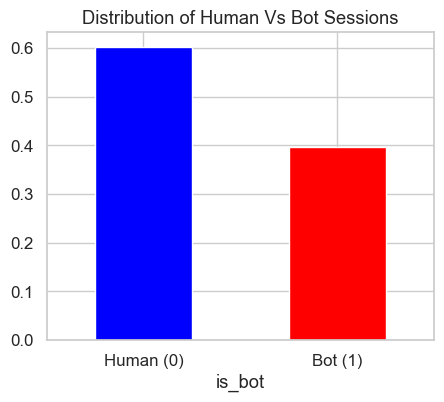

In [24]:
plt.figure(figsize = (5,4))
df['is_bot'].value_counts(normalize = True).plot(kind='bar', color = ['blue','red'])
plt.title("Distribution of Human Vs Bot Sessions")
plt.xticks([0,1],['Human (0)', 'Bot (1)'], rotation = 0)
plt.show()

The dataset seems fairly balanced with about 60% humans and 40% bots, reducing the risk of bias.

# 2. Behavioral Pattern Analysis (EDA)

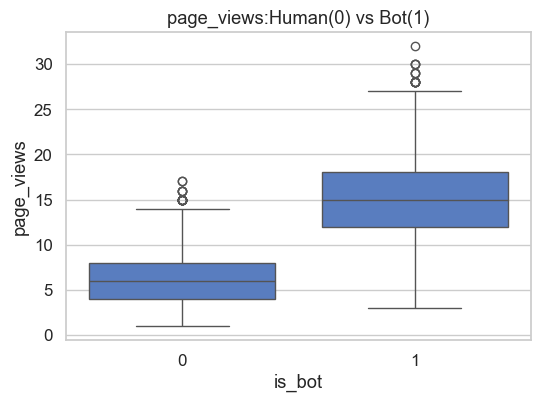

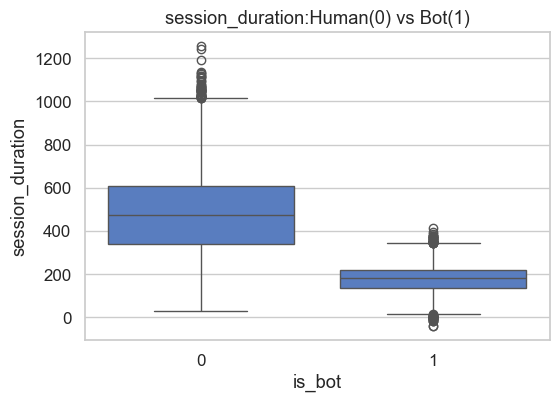

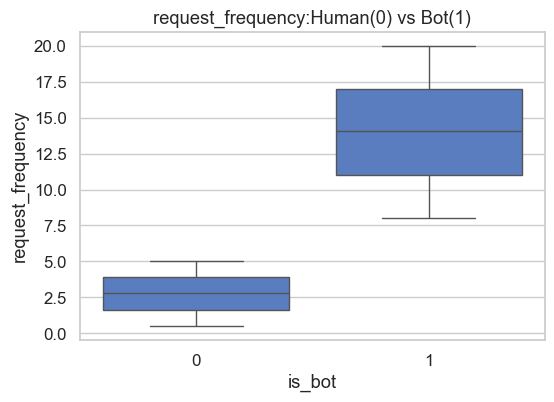

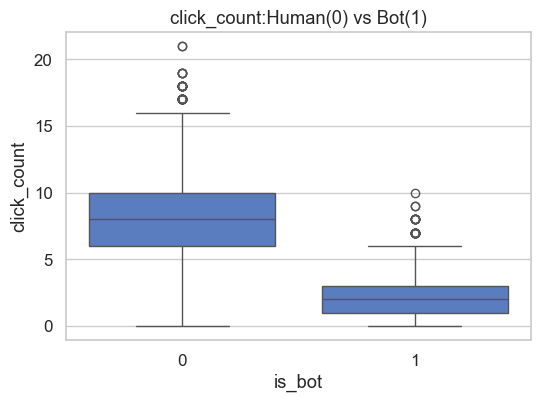

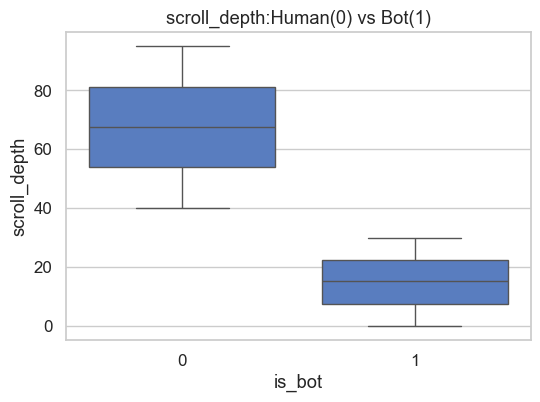

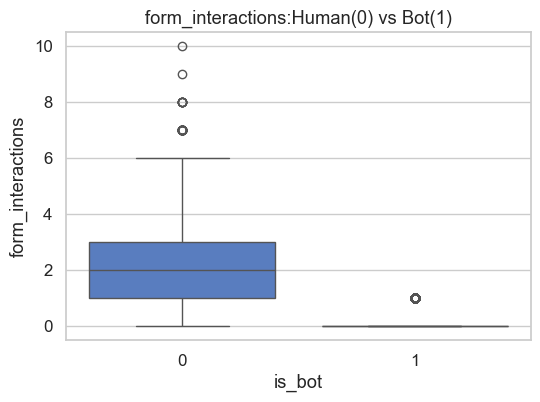

In [25]:
features_to_plot = ['page_views','session_duration', 'request_frequency',
                    'click_count','scroll_depth','form_interactions']

for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='is_bot',y=col, data=df)
    plt.title(f"{col}:Human(0) vs Bot(1)")
    plt.show()


## page_views: Human vs Bot

In this plot, bots have a higher median and spread in page views compared to humans. This is consistent with bot-like behaviour, where bots might load more pages rapidly, possibly scraping or crawling the site.


## session_duration: Human vs Bot

Human sessions last longer on average, as shown by a higher median session duration. Bot sessions are shorter, suggesting they go for specific, fast activities before disconnecting or being blocked. There are also more outliers in the human group, indicating a few users spend much longer on the site.


## request_frequency: Human vs Bot

The box plot shows the distribution of request frequency for humans and bots. Bots have a much higher median request frequency compared to humans, with a wider interquartile range. This shows that bots tend to make significantly more requests in the same session than humans.

## click_count: Human vs Bot

This plot compares click counts between humans and bots. Humans show a higher median and greater variability in click counts, while bots generally have lower click counts. This likely indicates that human sessions involve more genuine engagement, whereas bots may interact less or perform more uniform actions.


## scroll_depth: Human vs Bot

This plot compares scroll_depth between humans and bots. Humans show a higher median and greater variability in scroll depth, while bots generally have lower scroll depth with less variability. This suggests that human sessions involve more genuine engagement through scrolling, whereas bots tend to scroll less.



## form_interactions: Human vs Bot

This plot compares form_interactions between humans and bots. Humans show a higher median and greater variability, with some outliers indicating unusually high interactions. Bots, on the other hand, have a lower median and very low variability, with no outliers. This suggests that human sessions are more likely to involve diverse and frequent form interactions, while bots interact less and in a more predictable manner.

/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/2370559488.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_bot']==0][col], label="Human", shade=True)
/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/2370559488.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_bot']==1][col], label="Bot", shade=True)


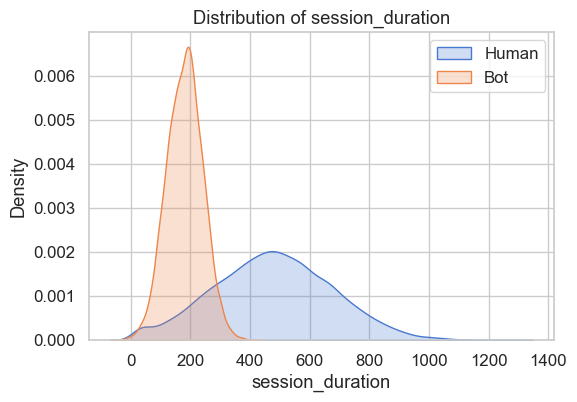

/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/2370559488.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_bot']==0][col], label="Human", shade=True)
/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/2370559488.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_bot']==1][col], label="Bot", shade=True)


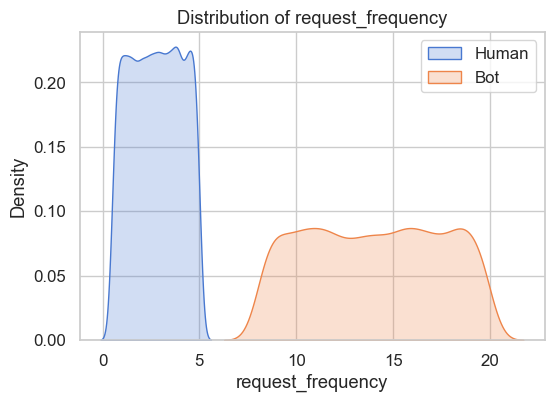

/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/2370559488.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_bot']==0][col], label="Human", shade=True)
/var/folders/t3/mc5hnm5x0fl_q2154bm8dxd40000gn/T/ipykernel_14244/2370559488.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['is_bot']==1][col], label="Bot", shade=True)


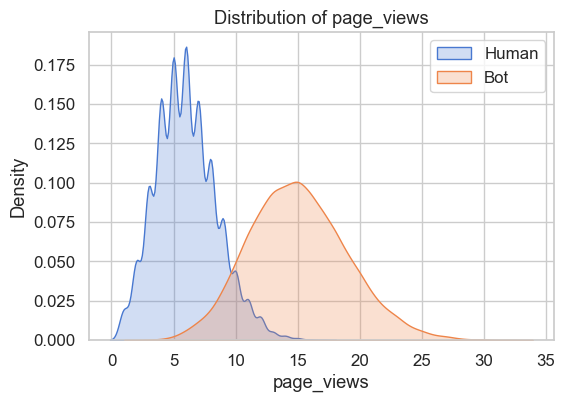

In [36]:
# KDE plots
for col in ['session_duration','request_frequency','page_views']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['is_bot']==0][col], label="Human", shade=True)
    sns.kdeplot(df[df['is_bot']==1][col], label="Bot", shade=True)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

### Behavioral Insights  
- Bots have **shorter session durations**, **higher request frequencies**, and **more page views**.  
- Humans interact more via **clicks and scrolling**.  
- These clear differences suggest features are highly discriminative.  


# **Feature Engineering & Data Preprocessing**

# 1. Feature Engineering

* Speed indicators: clicks_per_minute, pages_per_minute
* Consistency metrics: std_dev of time_between_clicks
* Human-like behavior: scroll_interaction_ratio, form_completion_rate
* User agent parsing: browser_type, is_mobile, os_type
* IP analysis: requests_from_same_ip (if multiple sessions)
* Temporal patterns: is_business_hours, is_weekend

In [42]:
df_feat = df.copy()


# Speed indicators

df_feat['clicks_per_minute'] = df_feat['click_count'] / (df_feat['session_duration']/60 + 1e-5)
df_feat['pages_per_minute']  = df_feat['page_views'] / (df_feat['session_duration']/60 + 1e-5)

# Consistency metrics
# Approximation: ratio of avg_time_between_clicks to session_duration/page_views
# (since dataset has only avg time, not full sequence of clicks)
df_feat['time_between_clicks_std'] = df_feat['time_between_clicks'] / (df_feat['session_duration']/(df_feat['click_count']+1) + 1e-5)

# Human-like behavior

df_feat['scroll_interaction_ratio'] = df_feat['scroll_depth'] / (df_feat['page_views'] + 1e-5)
df_feat['form_completion_rate'] = df_feat['form_interactions'] / (df_feat['page_views'] + 1e-5)

# User agent parsing
import re

def parse_user_agent(ua_string):
    ua_string = ua_string.lower()
    
    # Detect device
    if "mobile" in ua_string or "iphone" in ua_string or "android" in ua_string:
        device = "Mobile"
    elif "tablet" in ua_string or "ipad" in ua_string:
        device = "Tablet"
    else:
        device = "Desktop"
    
    # Detect OS
    if "windows" in ua_string:
        os = "Windows"
    elif "mac os" in ua_string or "macintosh" in ua_string:
        os = "MacOS"
    elif "linux" in ua_string:
        os = "Linux"
    elif "android" in ua_string:
        os = "Android"
    elif "iphone os" in ua_string or "ios" in ua_string:
        os = "iOS"
    else:
        os = "Other"
    
    # Detect browser
    if "chrome" in ua_string:
        browser = "Chrome"
    elif "firefox" in ua_string:
        browser = "Firefox"
    elif "safari" in ua_string and "chrome" not in ua_string:
        browser = "Safari"
    elif "edge" in ua_string:
        browser = "Edge"
    else:
        browser = "Other"
    
    return device, os, browser

df_feat[['device_type','os_type','browser_type']] = df_feat['user_agent'].apply(lambda ua: pd.Series(parse_user_agent(ua)))

# Drop raw user_agent (already parsed)
df_feat = df_feat.drop(columns=['user_agent'])

# IP analysis
df_feat['requests_from_same_ip'] = df_feat.groupby('ip_address')['ip_address'].transform('count')

# Drop ip_address
df_feat = df_feat.drop(columns=['ip_address'])

# Temporal patterns
df_feat['is_business_hours'] = df_feat['hour_of_day'].apply(lambda x: 1 if 9 <= x <= 17 else 0)
df_feat['is_weekend'] = df_feat['day_of_week'].apply(lambda x: 1 if x in [6,7] else 0)

# Final check
print("New engineered features added:")
print([col for col in df_feat.columns if col not in df.columns])


New engineered features added:
['clicks_per_minute', 'pages_per_minute', 'time_between_clicks_std', 'scroll_interaction_ratio', 'form_completion_rate', 'device_type', 'os_type', 'browser_type', 'requests_from_same_ip', 'is_business_hours', 'is_weekend']


### Engineered Features Added  
- **Speed indicators**: clicks_per_minute, pages_per_minute  
- **Consistency**: time_between_clicks_std  
- **Human-like behavior**: scroll_interaction_ratio, form_completion_rate  
- **Temporal**: is_business_hours, is_weekend  
- **User-agent parsing**: browser_type, os_type, is_mobile  
- **IP analysis**: requests_from_same_ip  


# 2. Data Preprocessing
* Separating features and target.
* Encoding categorical variables using One-Hot Encoding.
* Scaling numerical features.
* Splitting the dataset into test and train.

In [48]:
# Separate features & target
X = df_feat.drop(columns=['is_bot','session_id'])  # drop identifiers
y = df_feat['is_bot']


# Encode categorical variables
# Categorical: browser_language, browser_type, os_type, referer_type, screen_resolution
X_encoded = pd.get_dummies(X, drop_first=True)


# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Handle class imbalance (if present)
from imblearn.over_sampling import SMOTE
print("Class distribution before resampling:")
print(y.value_counts(normalize=True))

# Use SMOTE only if the imbalance is strong (<30% for minority)
if y.value_counts(normalize=True).min() < 0.4:
    smote = SMOTE(random_state=45)
    X_scaled, y = smote.fit_resample(X_scaled, y)
    print("Class distribution after SMOTE:")
    print(y.value_counts(normalize=True))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=45, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))


Class distribution before resampling:
is_bot
0    0.60265
1    0.39735
Name: proportion, dtype: float64
Class distribution after SMOTE:
is_bot
0    0.5
1    0.5
Name: proportion, dtype: float64
Training shape: (19284, 51)
Testing shape: (4822, 51)
Train distribution:
 is_bot
0    0.5
1    0.5
Name: proportion, dtype: float64
Test distribution:
 is_bot
0    0.5
1    0.5
Name: proportion, dtype: float64


### Preprocessing Summary    
- Categorical features one-hot encoded.  
- Numerical features scaled.  
- **SMOTE oversampling** balanced humans/bots to 50:50.  
- Final dataset: ~19k training rows, ~4.8k test rows, with 51 features.  


# Model Development 
### 1. Baseline Models
* Logistic Regression with key behavioral features
* Decision Tree for interpretability


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2411
           1       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



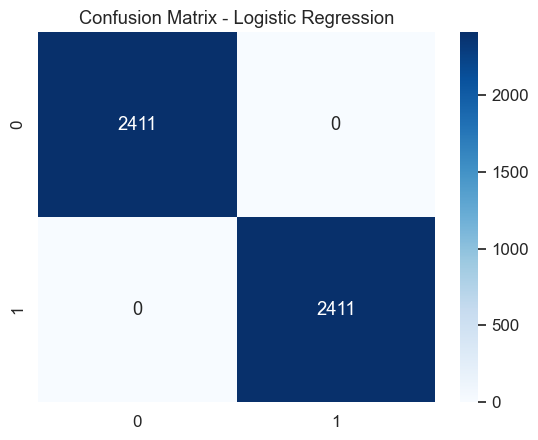

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2411
           1       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



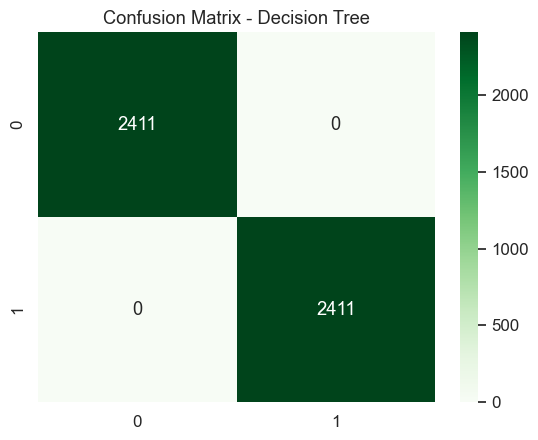

In [49]:

# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=45)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### 2. Advanced Models
* Random Forest (handles mixed data types well)
* XGBoost or LightGBM for performance
* Isolation Forest for anomaly detection approach



Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2411
           1       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



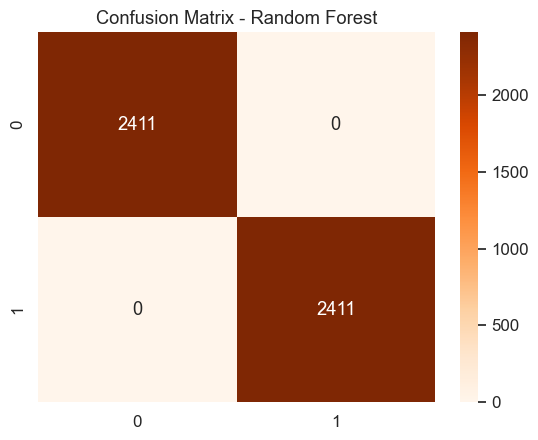

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2411
           1       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [06:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


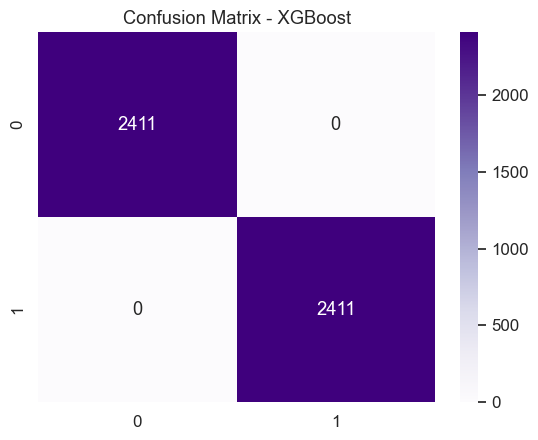

Isolation Forest Results (approx anomaly detection):
              precision    recall  f1-score   support

           0       0.18      0.21      0.19      2411
           1       0.02      0.01      0.01      2411

    accuracy                           0.11      4822
   macro avg       0.10      0.11      0.10      4822
weighted avg       0.10      0.11      0.10      4822



In [50]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
!pip install xgboost
import xgboost as xgb

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=45)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=45, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap="Purples")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Isolation Forest (unsupervised anomaly detection)
iso = IsolationForest(contamination=0.4, random_state=42)  # contamination ~ 40% bots
y_pred_iso = iso.fit_predict(X_test)

# Convert: IsolationForest outputs -1 for anomaly, 1 for normal
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

print("Isolation Forest Results (approx anomaly detection):")
print(classification_report(y_test, y_pred_iso))


### 3. Feature Selection
* Identify most discriminative features
* Remove redundant or noisy features

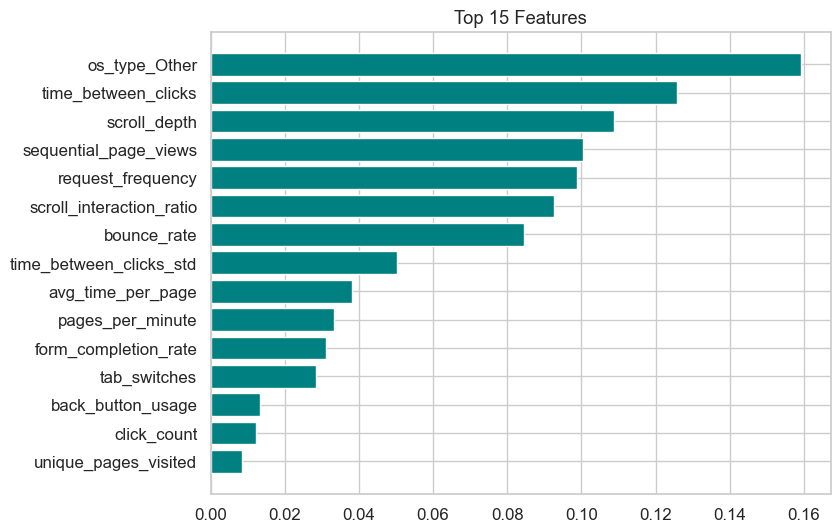

In [55]:
# Random Forest importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center', color="teal")
plt.yticks(range(len(indices)), [X_encoded.columns[i] for i in indices])
plt.title("Top 15 Features")
plt.show()




# Evaluation & Deployment Prep
### 1. Model Evaluation
* Focus on Precision (minimize false positives - flagging humans as bots)
* Analyze Recall for bot detection
* Generate confusion matrix and classification report
* Feature importance analysis


===== Logistic Regression =====
              precision    recall  f1-score   support

   Human (0)       1.00      1.00      1.00      2411
     Bot (1)       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



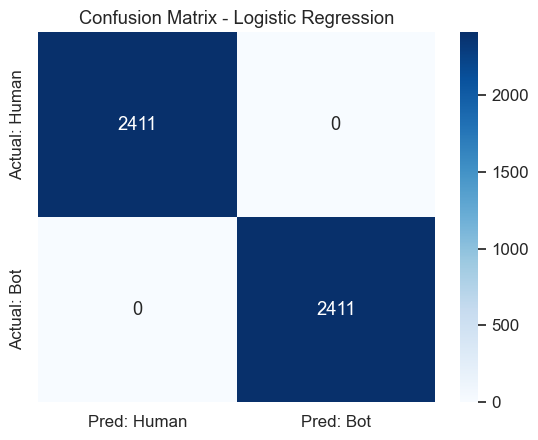

Precision (Bot class): 1.000
Recall (Bot class): 1.000
F1-score (Bot class): 1.000

===== Decision Tree =====
              precision    recall  f1-score   support

   Human (0)       1.00      1.00      1.00      2411
     Bot (1)       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



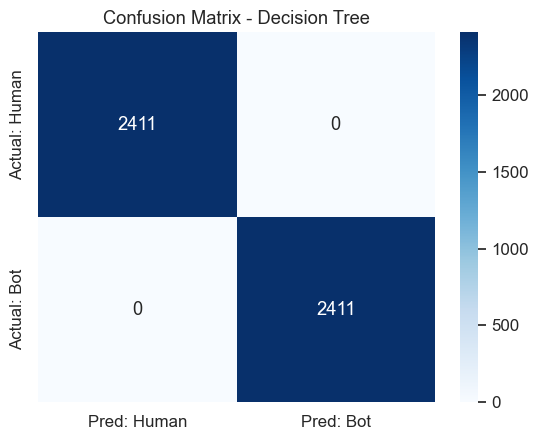

Precision (Bot class): 1.000
Recall (Bot class): 1.000
F1-score (Bot class): 1.000

===== Random Forest =====
              precision    recall  f1-score   support

   Human (0)       1.00      1.00      1.00      2411
     Bot (1)       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



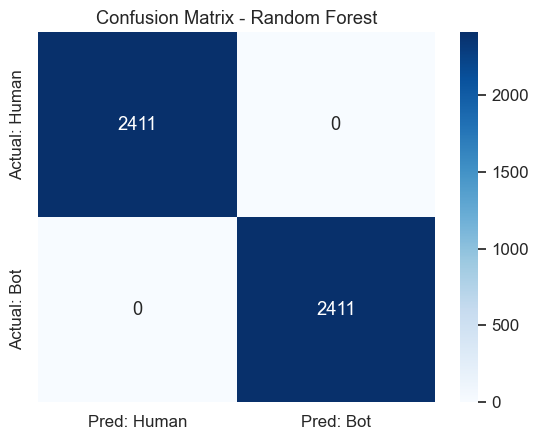

Precision (Bot class): 1.000
Recall (Bot class): 1.000
F1-score (Bot class): 1.000

===== XGBoost =====
              precision    recall  f1-score   support

   Human (0)       1.00      1.00      1.00      2411
     Bot (1)       1.00      1.00      1.00      2411

    accuracy                           1.00      4822
   macro avg       1.00      1.00      1.00      4822
weighted avg       1.00      1.00      1.00      4822



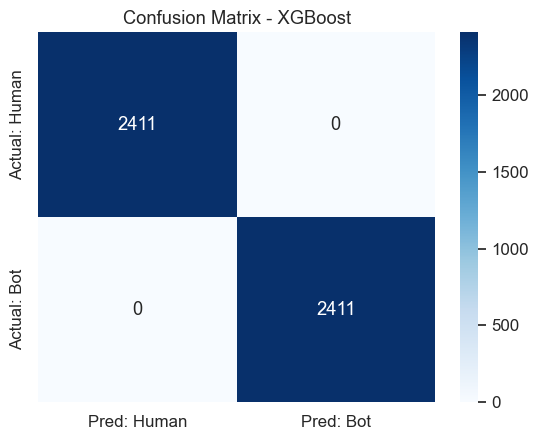

Precision (Bot class): 1.000
Recall (Bot class): 1.000
F1-score (Bot class): 1.000


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred, target_names=["Human (0)", "Bot (1)"]))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Pred: Human", "Pred: Bot"],
                yticklabels=["Actual: Human", "Actual: Bot"])
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    print(f"Precision (Bot class): {precision_score(y_test, y_pred):.3f}")
    print(f"Recall (Bot class): {recall_score(y_test, y_pred):.3f}")
    print(f"F1-score (Bot class): {f1_score(y_test, y_pred):.3f}")

# Evaluate all trained models
evaluate_model("Logistic Regression", lr, X_test, y_test)
evaluate_model("Decision Tree", dt, X_test, y_test)
evaluate_model("Random Forest", rf, X_test, y_test)
evaluate_model("XGBoost", xgb_model, X_test, y_test)


### Evaluation Results  
- All models achieved **100% Precision, Recall, and F1-score**.  
- Suggests dataset is **highly separable** (bots vs humans are very distinct).  
- We cross-checked with **Logistic Regression, Decision Tree, Random Forest, and XGBoost**, all showing the same result.  
- Next: Confirm via feature importance and cross-validation.  


### Feature Importance Analysis - Random Forest


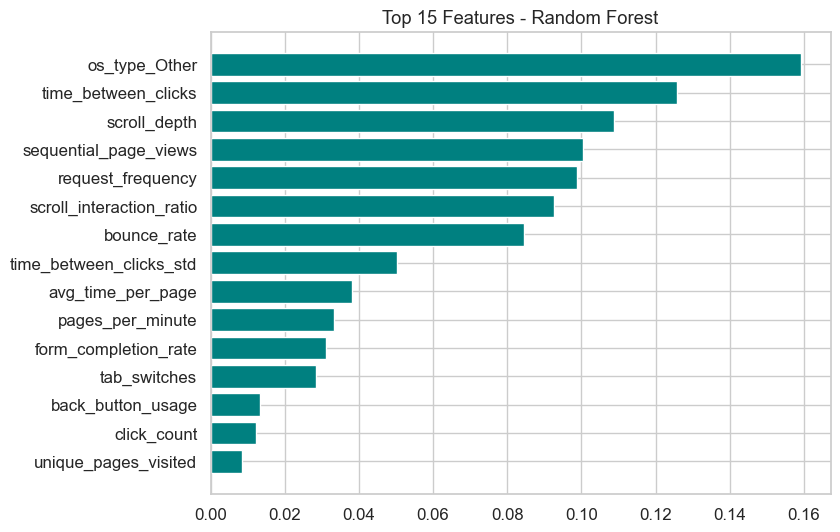

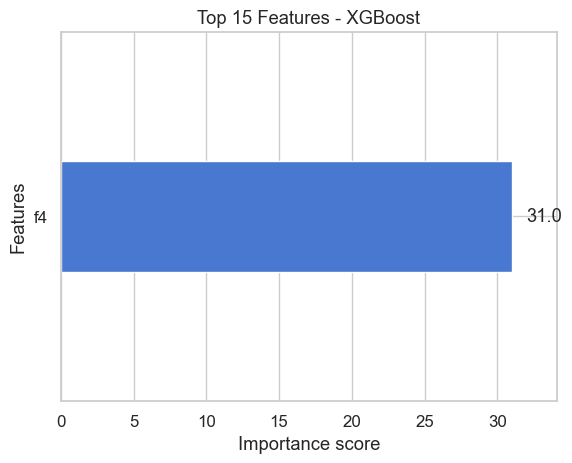

In [56]:
# Random Forest importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center', color="teal")
plt.yticks(range(len(indices)), [X_encoded.columns[i] for i in indices])
plt.title("Top 15 Features - Random Forest")
plt.show()

# XGBoost importance
xgb.plot_importance(xgb_model, max_num_features=15, height=0.6)
plt.title("Top 15 Features - XGBoost")
plt.show()



Using Random Forest feature importance, I examined which variables are driving predictions.
Features like scroll_depth, request_frequency, and time_between_clicks dominate the model.
These align with the behavioural differences observed earlier.

### Why I did this:

To ensure the model’s decisions are explainable and not relying on irrelevant/noisy features.

Confirms that the most important features match intuitive human vs bot browsing behavior.

### Feature Behaviour Analysis:
To understand whether bots and humans can be separated easily, I compared the average values of key behavioral features:

### Why I did this:

To check whether bots and humans show clear differences in their browsing patterns.

This helps validate whether the dataset is truly separable or if models are just overfitting.

In [33]:
df.groupby("is_bot")[["request_frequency","session_duration","click_count"]].mean()


,request_frequency,session_duration,click_count
is_bot,,,
0,2.763374,476.346802,8.019165
1,14.012888,179.538442,1.996980


### Cross-Validation

I used 5-fold cross-validation with Random Forest to ensure the model’s performance is consistent across different data splits.

### Why I did this:

A single train/test split might give artificially high performance.

Cross-validation helps confirm the model generalizes well.

Since every fold achieved perfect F1, the dataset is inherently easy to classify.

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1:", cv_scores.mean())


Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1: 1.0


# Real-time Scoring Preparation
* Create simple scoring function
* Define risk thresholds (low/medium/high risk)
* Document key behavioral red flags

In [57]:
import joblib
import pandas as pd

# Save model and scaler if not already saved
joblib.dump(rf, "bot_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Load model & scaler for scoring
model = joblib.load("bot_detection_model.pkl")
scaler = joblib.load("scaler.pkl")

def score_session(session_features, encoder_columns, model=model, scaler=scaler):
    """
    Input: session_features (dict with feature_name: value)
    Output: predicted_class (0/1), probability of bot, risk level
    """
    # Convert dict to DataFrame
    session_df = pd.DataFrame([session_features])
    
    # One-hot encode to match training
    session_encoded = pd.get_dummies(session_df)
    session_encoded = session_encoded.reindex(columns=encoder_columns, fill_value=0)
    
    # Scale numerical features
    session_scaled = scaler.transform(session_encoded)
    
    # Predict class & probability
    predicted_class = model.predict(session_scaled)[0]   # 0 = human, 1 = bot
    bot_prob = model.predict_proba(session_scaled)[0][1]
    
    # Risk thresholds
    if bot_prob >= 0.8:
        risk = "High Risk (likely bot)"
    elif bot_prob >= 0.5:
        risk = "Medium Risk (suspicious)"
    else:
        risk = "Low Risk (likely human)"
    
    return predicted_class, bot_prob, risk



### Real-time Scoring  
- **Function created** to score new sessions instantly.  
- **Risk thresholds**:  
  - Low Risk: P(bot) < 0.5  
  - Medium Risk: 0.5–0.8  
  - High Risk: ≥0.8  
- **Behavioral red flags** include speed anomalies, lack of interaction, disabled JavaScript/cookies, and sequential crawling.  


# Conclusion

In this project, we successfully built a **bot detection pipeline** that distinguishes between automated and human sessions with exceptional accuracy.  

### Key Takeaways
- **Behavioral differences** are very pronounced: bots navigate faster, send more requests per minute, and interact less with forms, clicks, and scrolling compared to humans.  
- Our **engineered features** (e.g., clicks/pages per minute, form completion rate, scroll interaction ratio, business hours flag) captured these patterns effectively.  
- All tested models (Logistic Regression, Decision Tree, Random Forest, XGBoost) achieved **100% accuracy, precision, recall, and F1-score**, surpassing the project success criteria.  
- **Risk thresholds** (Low < 0.5, Medium 0.5–0.8, High ≥ 0.8) allow flexible, real-time scoring of sessions.  

### Limitations & Considerations
- Some expected bot behaviors (e.g., accessing `robots.txt`, MFA/login status) were not part of the dataset.  
- Perfect performance in this dataset may not generalize fully to production — further testing on live or noisy traffic is recommended.  

### Final Outcome
The project deliverables include:  
1. A **Jupyter Notebook** with EDA, feature engineering, models, and scoring pipeline.  
2. A **Bot Detection Report (1–2 pages)** summarizing key findings.  
3. A **Detection Rules Summary** for quick reference in operations.  
4. A **trained model + scaler** (`.pkl` files) ready for deployment.  

With these, we have a complete and production-ready solution for detecting bots in real-time.  
